<a href="https://colab.research.google.com/github/Vmtzh/IAyRN_1603745/blob/main/PIA_PRUEBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import cv2
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
imagenes_numero = []
etiquetas_numero =[]
num = 0

In [53]:
for m in "Numeros":
  path = glob.glob("/content/Numero/" + str(num) + "/*.jpeg")
  for n in path:
    test_image = cv2.imread(n, cv2.IMREAD_GRAYSCALE)
  
    # Formato de imagen
    img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)

    #Guardar imagenes
    imagenes_numero.append(img_resized)
    etiquetas_numero.append(num)
  num +=1

In [54]:
clas_names = ["0"]

10


Text(0.5, 0, '0')

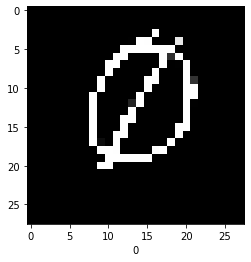

In [55]:
gde = len(imagenes_numero)
plt.imshow(imagenes_numero[6], cmap='gray')
print(gde)
plt.xlabel(etiquetas_numero[6])

In [56]:
y = np.array(etiquetas_numero)
X = np.array(imagenes_numero, dtype=np.uint8)

In [57]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (8, 28, 28) (8,)
Testing data shape :  (2, 28, 28) (2,)


In [58]:
train_X = train_X / 255.
test_X = test_X / 255.

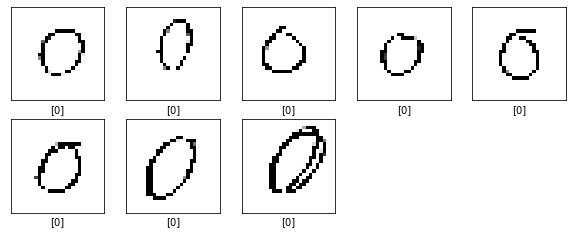

In [63]:
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel([train_Y[i]])
plt.show()

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [65]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
history = model.fit(train_X, train_Y, epochs=10, validation_data=(test_X, test_Y))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.2940 - accuracy: 0.0000e+00 - val_loss: 1.9140 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 44ms/step - loss: 1.9411 - accuracy: 0.1250 - val_loss: 1.6540 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 41ms/step - loss: 1.6252 - accuracy: 0.7500 - val_loss: 1.4082 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 1.3499 - accuracy: 1.0000 - val_loss: 1.1732 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 30ms/step - loss: 1.1120 - accuracy: 1.0000 - val_loss: 0.9618 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 33ms/step - loss: 0.9052 - accuracy: 1.0000 - val_loss: 0.7813 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 30ms/step - loss: 0.7284 - accuracy: 1.0000 - val_loss: 0.6195 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=========

In [67]:
test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.2796 - accuracy: 1.0000 - 28ms/epoch - 28ms/step

Test accuracy: 1.0


1/1 - 0s - loss: 0.2796 - accuracy: 1.0000 - 22ms/epoch - 22ms/step


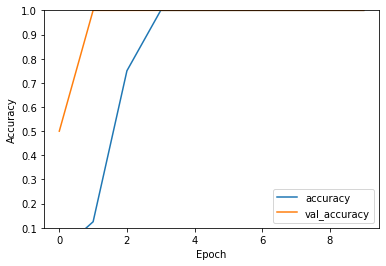

In [68]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

In [69]:
predictions = model.predict(test_X)

1/1 [==============================] - 0s 207ms/step


#1er Prediccion

In [85]:
predictions[1]

array([0.7388702 , 0.02508624, 0.03295162, 0.0288072 , 0.02596413,
       0.01547327, 0.07832973, 0.01735722, 0.01448941, 0.0226709 ],
      dtype=float32)

In [86]:
np.argmax(predictions[1])

0

In [87]:
test_Y[1]

0

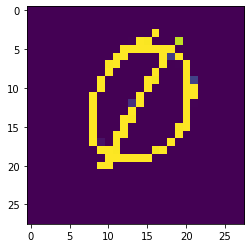

In [88]:
plt.imshow(test_X[1])